In [1396]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime, timezone
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, MaxPooling1D, Conv1D, LSTM, SimpleRNN
from kerastuner.tuners import RandomSearch, Hyperband
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import f1_score
from sympy import symbols, solve
import sympy
from scipy.optimize import curve_fit

In [1397]:
dfHeating = pd.read_csv("decaycurveHeat.txt", sep=",")
means = []
columns = dfHeating.columns[3:]
for col in columns:
    means.append(dfHeating[col][10:].mean())

In [1398]:
dfCooling = pd.read_csv("decaycurveCold.txt", sep=",")
coldMeans = []
columns = dfCooling.columns[3:]
for col in columns:
    coldMeans.append(dfCooling[col][10:].mean())

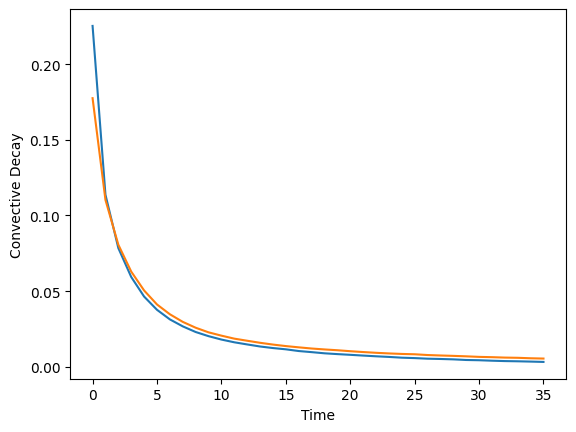

In [1399]:
plt.plot(np.arange(len(coldMeans)), coldMeans)
plt.plot(np.arange(len(means)), means)
plt.xlabel("Time")
plt.ylabel("Convective Decay")
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

hotModel = ARIMA(means, order=(2, 0, 2))
hotModelFit = hotModel.fit()
hotModelPredict = hotModelFit.predict(start=0, end=len(means) + 10)
plt.plot(np.arange(len(hotModelPredict)), hotModelPredict)
plt.plot(np.arange(len(means)), means)
plt.show()

In [ ]:
coldModel = ARIMA(coldMeans, order=(2, 0, 2))
coldModelFit = coldModel.fit()
coldModelPredict = coldModelFit.predict(start=0, end=len(coldMeans) + 10)
plt.plot(np.arange(len(coldModelPredict)), coldModelPredict)
plt.plot(np.arange(len(coldMeans)), coldMeans)
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

hotModel = SimpleExpSmoothing(means)
hotModelFit = hotModel.fit()
hotModelPredict = hotModelFit.predict(start=0, end=len(means) + 10)
plt.plot(np.arange(len(hotModelPredict)), hotModelPredict)
plt.plot(np.arange(len(means)), means)
plt.show()

In [ ]:
coldModel = SimpleExpSmoothing(coldMeans)
coldModelFit = coldModel.fit()
coldModelPredict = coldModelFit.predict(start=0, end=len(coldMeans) + 10)
plt.plot(np.arange(len(coldModelPredict)), coldModelPredict)
plt.plot(np.arange(len(coldMeans)), coldMeans)
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
early_stopping_callback = EarlyStopping(monitor='loss', patience=50)
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
xLabel = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
model.fit(np.array(xLabel), np.array(means), epochs=1000, verbose=1, callbacks=[early_stopping_callback])
results = model.predict(np.arange(start=1, stop=45))
plt.plot(np.arange(start=1, stop=45), results)
plt.plot(xLabel, means)
plt.show()

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0061
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070  
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025

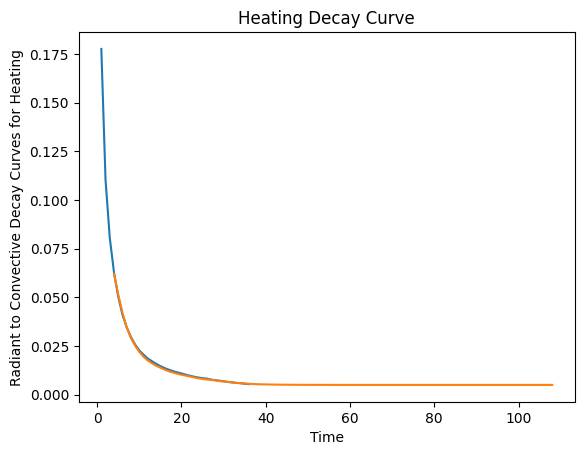

[0.06206105649471283, 0.05160769447684288, 0.04220294952392578, 0.03474302962422371, 0.02921975962817669, 0.025257211178541183, 0.022042296826839447, 0.019547509029507637, 0.017642533406615257, 0.016167741268873215, 0.01488490030169487, 0.013911901041865349, 0.012910732999444008, 0.012089820578694344, 0.011396294459700584, 0.010789015330374241, 0.010249179787933826, 0.009831633418798447, 0.009380019269883633, 0.008879624307155609, 0.008476578630506992, 0.00812375545501709, 0.00784371793270111, 0.007642206735908985, 0.007370504550635815, 0.006992156617343426, 0.006813528016209602, 0.006601873319596052, 0.006321490742266178, 0.006091035902500153, 0.00593630550429225, 0.005754713434726, 0.005603002384305, 0.0055071283, 0.0054158955, 0.0053532845, 0.005293406, 0.0052506803, 0.0052106185, 0.0051812837, 0.0051543443, 0.0051342133, 0.0051160585, 0.005102265, 0.0050900127, 0.005080575, 0.0050722966, 0.0050658463, 0.005060248, 0.0050558434, 0.005052054, 0.0050490494, 0.0050464827, 0.0050444338,

In [1400]:
def rational_function(x, a, b, c, d, e):
    return( (a) / ( (b*(x**3)) + (c* (x**2)) + (d * x) + e) )

def build_model(hp):
    model = Sequential()
    model.add(Input((3,)))
    model.add(Dense(10))
    model.add(Dense(40))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_absolute_error")
    return model

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
y_train = means[3:]
x_train = []
for i in range(len(means)):
    if (i>=3):
        x_train.append(means[i-3:i])

early_stopping_callback = EarlyStopping(monitor='loss', patience=100)

model = build_model(0)
model.fit(np.array(x_train), np.array(y_train), epochs=1000, callbacks=[early_stopping_callback])
results = model.predict(np.array(x_train))
for i in range(2*len(means)):
    temp = []
    for val in results[-3:]:
        if type(val) is list:
            temp.append(val[0])
        else:
            temp.append(val)
    temp = np.array(temp)
    temp = np.reshape(temp, (3,))
    temp = temp.reshape(1, -1)
    newVal = model.predict(temp)
    if type(results) is not list:
        results = results.tolist()
    results.append([newVal[0][0]])

line = np.polyfit(np.arange(start=1, stop=1+len(y_train)), y_train, 5)

x = symbols('x')
equation = line[0]*(x**5) + line[1]*(x**4) + line[2]*(x**3) + line[3]*(x**2) + line[4]*x + line[5] - 0.0005
roots = solve(equation, x)
print("Predicted zero from polynomial actual data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

line = np.polyfit(np.arange(start=4, stop=4+len(results)), results, 5)
equation = line[0]*(x**5) + line[1]*(x**4) + line[2]*(x**3) + line[3]*(x**2) + line[4]*x + line[5] - 0.0005
roots = solve(equation, x)
print("Predicted zero from polynomial predicted data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

x = symbols('x')
params, covariance = curve_fit(rational_function, np.arange(start=1, stop=1+len(means)).reshape(-1), np.array(means).reshape(-1))
a_fit, b_fit, c_fit, d_fit, e_fit = params
equation = ((a_fit) / ((b_fit*(x**3)) + (c_fit * (x**2)) + (d_fit * x) + e_fit)) - 0.0005
roots = solve(equation, x)
print("Predicted zero from rational actual data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

params, covariance = curve_fit(rational_function, np.arange(start=4, stop=len(results)+4).reshape(-1), np.array(results).reshape(-1))
a_fit, b_fit, c_fit, d_fit, e_fit = params
equation = ((a_fit) / ((b_fit*(x**3)) + (c_fit * (x**2)) + (d_fit * x) + e_fit)) - 0.0005
roots = solve(equation, x)
print("Predicted zero from rational predicted data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

plt.plot(np.arange(start=1, stop=1+len(means)), means)
plt.plot(np.arange(start=4, stop=len(results)+4), results)
plt.xlabel("Time")
plt.ylabel("Radiant to Convective Decay Curves for Heating")
plt.title("Heating Decay Curve")
plt.show()
def first(n):
    if (type(n) is list and len(n) > 0):
          return n[0]
    else:
         return n
print(list(map(first, results)))

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 
Epoc

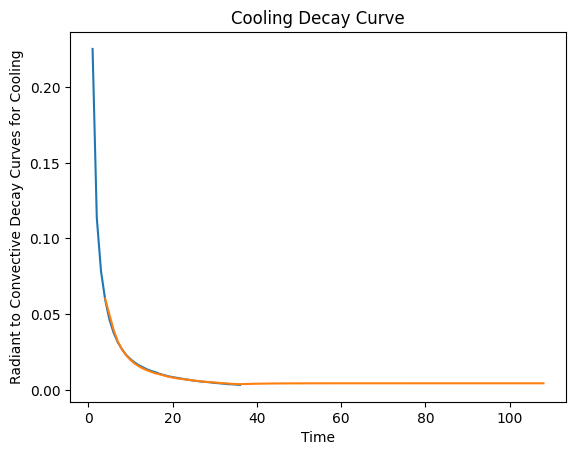

[0.06016695126891136, 0.04969142749905586, 0.03949335962533951, 0.031920887529850006, 0.026636093854904175, 0.02271449938416481, 0.019704006612300873, 0.01730956882238388, 0.015494205057621002, 0.013982751406729221, 0.01278907060623169, 0.011755350045859814, 0.010833527892827988, 0.010154037736356258, 0.009402092546224594, 0.008638952858746052, 0.008107533678412437, 0.007593241520226002, 0.007236950099468231, 0.006863127928227186, 0.006478914991021156, 0.006135549396276474, 0.005782407242804766, 0.0054705324582755566, 0.005237758159637451, 0.004997700918465853, 0.004849257878959179, 0.004577132407575846, 0.004330511670559645, 0.004177203867584467, 0.003941486589610577, 0.003798941383138299, 0.003682555165141821, 0.003839584, 0.0038644657, 0.003970816, 0.004005627, 0.0040707565, 0.0041006547, 0.004141373, 0.0041644014, 0.0041905222, 0.0042074053, 0.004224497, 0.0042365417, 0.004247888, 0.0042563425, 0.0042639496, 0.0042698276, 0.0042749597, 0.004279021, 0.0042824997, 0.0042852955, 0.004

In [1401]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
y_train = coldMeans[3:]
x_train = []
for i in range(len(coldMeans)):
    if (i>=3):
        x_train.append(coldMeans[i-3:i])
early_stopping_callback = EarlyStopping(monitor='loss', patience=100)
model = build_model(0)
model.fit(np.array(x_train), np.array(y_train), epochs=1000, callbacks=[early_stopping_callback])
results = model.predict(np.array(x_train))
for i in range(2*len(coldMeans)):
    temp = []
    for val in results[-3:]:
        if type(val) is list:
            temp.append(val[0])
        else:
            temp.append(val)
    temp = np.array(temp)
    temp = np.reshape(temp, (3,))
    temp = temp.reshape(1, -1)
    newVal = model.predict(temp)
    if type(results) is not list:
        results = results.tolist()
    results.append([newVal[0][0]])
line = np.polyfit(np.arange(start=1, stop=1+len(y_train)), y_train, 5)

x = symbols('x')
equation = line[0]*(x**5) + line[1]*(x**4) + line[2]*(x**3) + line[3]*(x**2) + line[4]*x + line[5] - 0.0005
roots = solve(equation, x)
print("Predicted zero from actual data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

line = np.polyfit(np.arange(start=4, stop=4+len(results)), results, 5)
equation = line[0]*(x**5) + line[1]*(x**4) + line[2]*(x**3) + line[3]*(x**2) + line[4]*x + line[5] - 0.0005
roots = solve(equation, x)
print("Predicted zero from predicted data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

x = symbols('x')
params, covariance = curve_fit(rational_function, np.arange(start=1, stop=1+len(coldMeans)).reshape(-1), np.array(coldMeans).reshape(-1))
a_fit, b_fit, c_fit, d_fit, e_fit = params
equation = ((a_fit) / ((b_fit*(x**3)) + (c_fit * (x**2)) + (d_fit * x) + e_fit)) - 0.0005
roots = solve(equation, x)
print("Predicted zero from rational actual data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

params, covariance = curve_fit(rational_function, np.arange(start=4, stop=len(results)+4),  np.array(results).reshape(-1))
a_fit, b_fit, c_fit, d_fit, e_fit = params
equation = ((a_fit) / ((b_fit * (x**3)) + (c_fit * (x**2)) + (d_fit * x) + e_fit)) - 0.0005
roots = solve(equation, x)
print("Predicted zero from rational predicted data:")
print(list(filter(lambda x: type(x) is not sympy.core.add.Add and float(x) > 0, roots)))

plt.plot(np.arange(start=1, stop=1+len(coldMeans)), coldMeans)
plt.plot(np.arange(start=4, stop=len(results)+4), results)
plt.xlabel("Time")
plt.ylabel("Radiant to Convective Decay Curves for Cooling")
plt.title("Cooling Decay Curve")
plt.show()
print(list(map(first, results)))